In [1]:
import datasets
import utils

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

In [2]:
# for segmentation02
utils.create_data_file_lists("data/segmentation02/segmentation")

In [3]:
data = "segmentation02"
data_dir = "data/segmentation02/segmentation"
utils.create_data_file_lists(data_dir)
utils.split_train_to_val(data, data_dir, val_ratio=0.1)

In [4]:
# from PIL import Image
# import numpy as np
# import torch

# class ToIntImage(object):
#     def __call__(self, image):
#         scaled = image*255
#         return Image.fromarray(scaled.numpy().astype(np.uint8))

# class ToMultiChannelMasks(object):
#     MASKS = {"background": 0, "heart": 85, "body": 170, "lung": 255}
#     MASKS_REVERSE = {0: 'background', 85: 'heart', 170: 'body',
#                      255: 'lung'}

#     def __call__(self, image):
#         masks = []
#         for _, value in self.MASKS.items():
#             mask = (image == value).float()
#             masks.append(mask)
#         return torch.stack(masks)

In [5]:
c_transform = transforms.Compose([
    transforms.ToTensor(),
])


In [6]:
dataset_train = datasets.Segmentation02(data_dir, "train", transform=c_transform, target_transform=utils.seg_transform)
dataset_val = datasets.Segmentation02(data_dir, "val", transform=c_transform, target_transform=utils.seg_transform)
dataset_test = datasets.Segmentation02(data_dir, "test", transform=c_transform, target_transform=utils.seg_transform)

dataset_train_dataloader = DataLoader(dataset_train, batch_size=2, shuffle=True, num_workers=4)
dataset_val_dataloader = DataLoader(dataset_val, batch_size=2, shuffle=True, num_workers=4)
dataset_test_dataloader = DataLoader(dataset_test, batch_size=2, shuffle=True, num_workers=4)

In [7]:
print("Training dataset size: ", len(dataset_train))
print("Valication dataset size: ", len(dataset_val))
print("Testing dataset size: ", len(dataset_test))

Training dataset size:  180
Valication dataset size:  19
Testing dataset size:  48


In [8]:
images, labels = next(iter(dataset_train_dataloader))

In [9]:
images.shape, labels.shape

(torch.Size([2, 1, 256, 256]), torch.Size([2, 4, 256, 256]))

In [10]:
images.shape

torch.Size([2, 1, 256, 256])

In [11]:
labels[0][1].max(), labels[0][1].min()

(tensor(1., dtype=torch.float64), tensor(0., dtype=torch.float64))

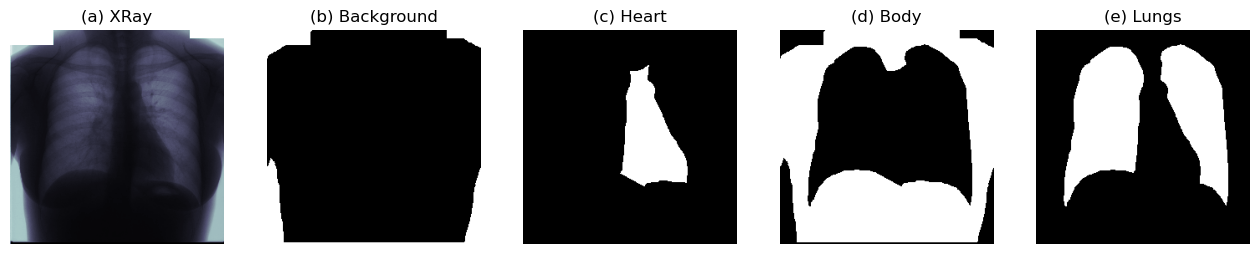

In [15]:
images, labels = next(iter(dataset_train_dataloader))
images = images.permute(0, 2, 3, 1).numpy()
# labels = labels.permute(0, 2, 3, 1).numpy()
idx=0
fig=plt.figure(figsize=(16,4))
fig.add_subplot(151)
plt.imshow(images[idx], cmap=plt.cm.bone)
plt.title("(a) XRay")
plt.axis("off")
fig.add_subplot(152)
plt.imshow(labels[idx][0], cmap="gray")
plt.title("(b) Background")
plt.axis("off")
fig.add_subplot(153)
plt.imshow(labels[idx][1], cmap="gray")
plt.title("(c) Heart")
plt.axis("off")
fig.add_subplot(154)
plt.imshow(labels[idx][2], cmap="gray")
plt.title("(d) Body")
plt.axis("off")
fig.add_subplot(155)
plt.imshow(labels[idx][3], cmap="gray")
plt.title("(e) Lungs")
plt.axis("off")
plt.show()


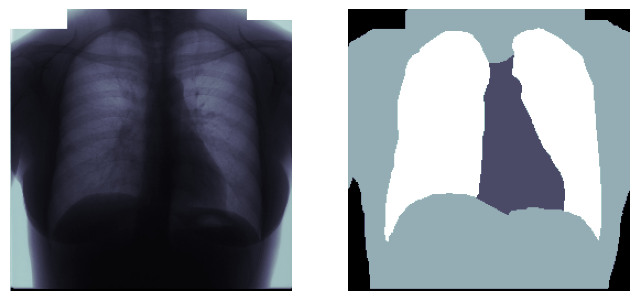

In [14]:
images, labels = next(iter(dataset_train_dataloader))
images = images.permute(0, 2, 3, 1).numpy()
labels = labels.permute(0, 2, 3, 1).numpy()
idx=0
fig=plt.figure(figsize=(8,4))
fig.add_subplot(121)
plt.imshow(images[idx], cmap=plt.cm.bone)
plt.axis("off")
fig.add_subplot(122)
plt.imshow(labels[idx], cmap=plt.cm.bone)
plt.axis("off")
plt.show()
